<a href="https://colab.research.google.com/github/faiyazansari566/Projects-practice/blob/main/LoanPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [6]:
df.shape

(614, 13)

In [7]:
## handling imbalance data

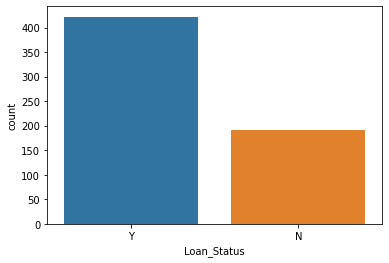

In [8]:
sns.countplot(df['Loan_Status'])

In [9]:
print('loan status YES' ,df['Loan_Status'].value_counts()[0] / df.shape[0] * 100 ,'%')
print('loan status NO' ,df['Loan_Status'].value_counts()[1] / df.shape[0] * 100 ,'%')

loan status YES 68.72964169381108 %
loan status NO 31.27035830618892 %


In [10]:
df.isnull().sum() #checking null values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])


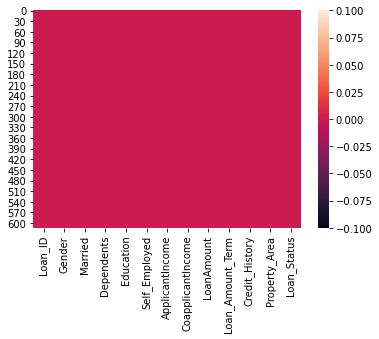

In [12]:
sns.heatmap(df.isnull())

In [13]:
##null values are handled

In [14]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [15]:
df.shape , x.shape , y.shape

((614, 13), (614, 12), (614,))

In [16]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

In [17]:
x2 , y2 = ros.fit_resample(x,y)
x2 = pd.DataFrame(x2,columns=df.columns[0:-1])
y2 = pd.DataFrame(y2,columns=['Loan_Status'])

In [174]:
df2 = pd.concat((x2,y2),axis=1)

In [175]:
df2.shape

(844, 13)

In [176]:
df2['Loan_Status'].value_counts()

N    422
Y    422
Name: Loan_Status, dtype: int64

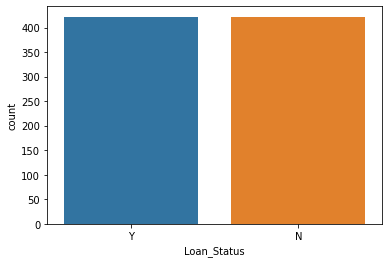

In [177]:
sns.countplot(df2['Loan_Status'])

In [178]:
## the data has been balanced

In [179]:
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,128,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y


In [180]:
df2.drop('Loan_ID',axis=1,inplace=True)

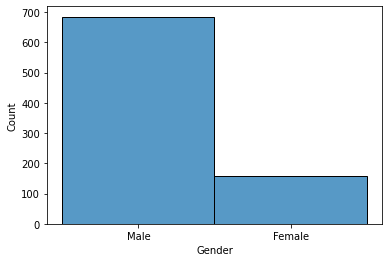

In [181]:
sns.histplot(df2['Gender'])

In [182]:
## men take more loans than women

In [183]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             844 non-null    object
 1   Married            844 non-null    object
 2   Dependents         844 non-null    object
 3   Education          844 non-null    object
 4   Self_Employed      844 non-null    object
 5   ApplicantIncome    844 non-null    object
 6   CoapplicantIncome  844 non-null    object
 7   LoanAmount         844 non-null    object
 8   Loan_Amount_Term   844 non-null    object
 9   Credit_History     844 non-null    object
 10  Property_Area      844 non-null    object
 11  Loan_Status        844 non-null    object
dtypes: object(12)
memory usage: 79.2+ KB


In [184]:
df2.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0,128,360,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N


In [185]:
df2['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [186]:
 df2['Dependents'] = df2['Dependents'].replace('3+','3.1')

In [187]:
df2['Dependents'].unique()

array(['0', '1', '2', '3.1'], dtype=object)

In [188]:
## removing outliers

In [189]:
df2['Dependents'] = df2['Dependents'].astype(float)
df2['ApplicantIncome'] = df2['ApplicantIncome'].astype(float)
df2['CoapplicantIncome'] = df2['CoapplicantIncome'].astype(float)
df2['LoanAmount'] = df2['LoanAmount'].astype(float)
df2['Loan_Amount_Term'] = df2['Loan_Amount_Term'].astype(float)

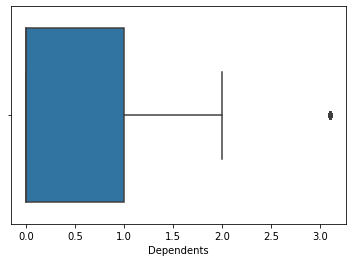

In [190]:
sns.boxplot(df2['Dependents'])

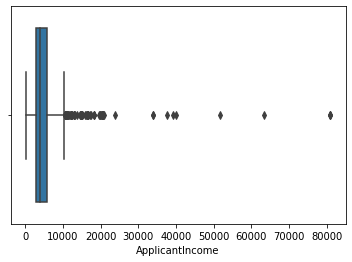

In [191]:
sns.boxplot(df2['ApplicantIncome'])

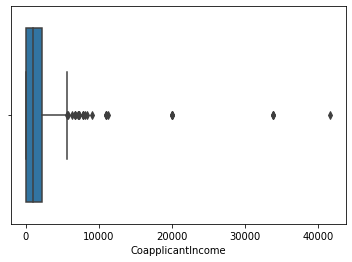

In [192]:
sns.boxplot(df2['CoapplicantIncome'])

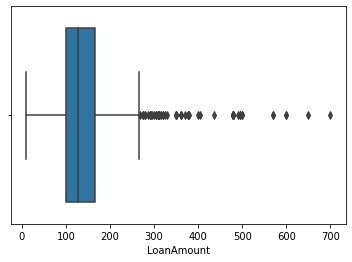

In [193]:
sns.boxplot(df2['LoanAmount'])

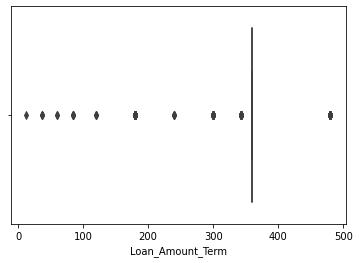

In [194]:
sns.boxplot(df2['Loan_Amount_Term'])

In [195]:
df3 = df2[~(df2['ApplicantIncome'] > 50000) & ~(df2['CoapplicantIncome'] > 30000) & ~(df2['LoanAmount'] >500) ]

In [196]:
df2.shape , df3.shape

((844, 12), (830, 12))

(<matplotlib.axes._subplots.AxesSubplot at 0x7f5ffd3af810>,)

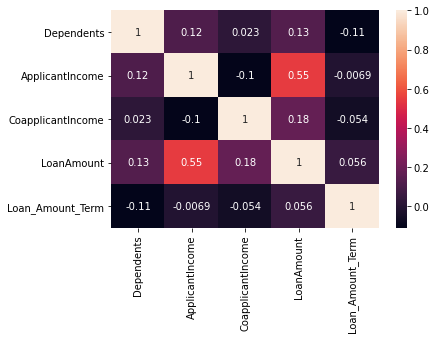

In [197]:
sns.heatmap(df2.corr(),annot=True), 

In [198]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [199]:
df3.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849.0,0.0,128.0,360.0,1,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1,Urban,Y


In [200]:
def encode(df,col):
  df[col] = le.fit_transform(df[col])

In [201]:
encode(df3,'Gender')
encode(df3,'Married')
encode(df3,'Education')
encode(df3,'Self_Employed')
encode(df3,'Property_Area')
encode(df3,'Loan_Status')

In [202]:
df3['Credit_History'] = df3['Credit_History'].astype(int)

In [203]:
from scipy.stats import skew

In [204]:
skew(df3['Education'])

1.1960631011968068

skewness value of Gender  : -1.5874218115185885




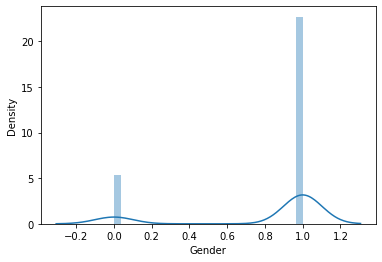

skewness value of Married  : -0.49655928181590614




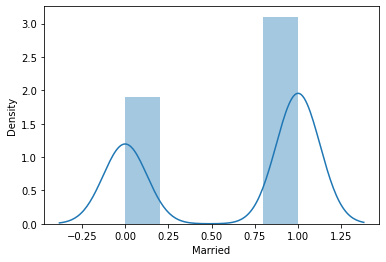

skewness value of Dependents  : 1.0909309552552628




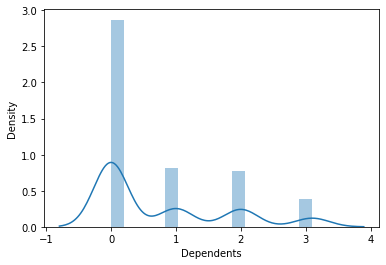

skewness value of Education  : 1.1960631011968068




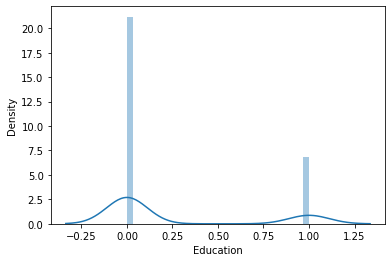

skewness value of Self_Employed  : 2.1675406162820403




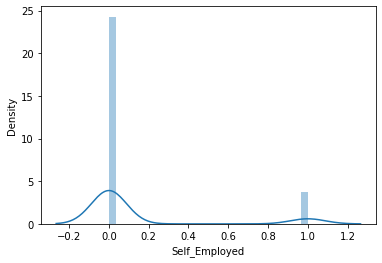

skewness value of ApplicantIncome  : 3.444186995078412




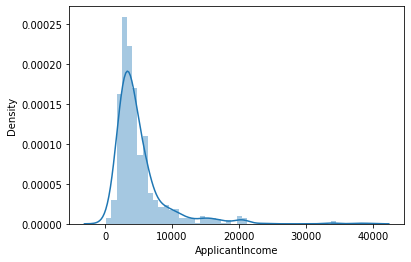

skewness value of CoapplicantIncome  : 3.7801193896990624




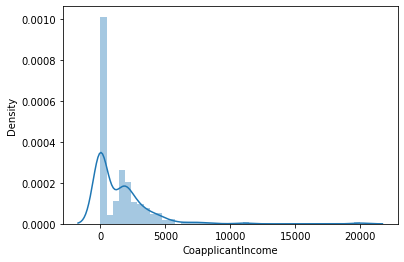

skewness value of LoanAmount  : 2.1038442569537437




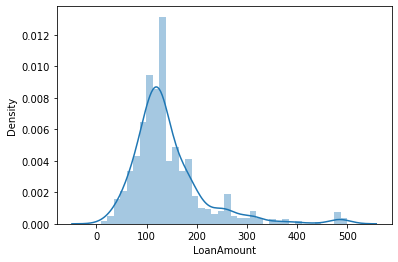

skewness value of Loan_Amount_Term  : -2.1842847596780777




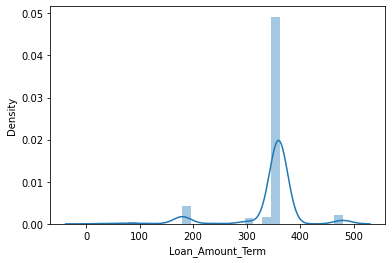

skewness value of Credit_History  : -1.4266600313206228




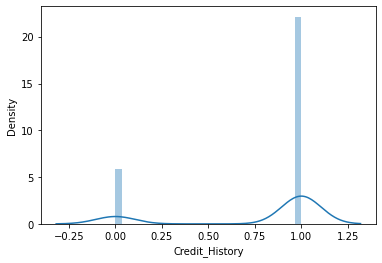

skewness value of Property_Area  : -0.030532048039548666




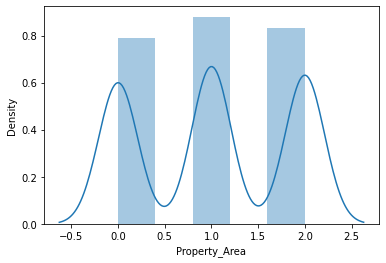

skewness value of Loan_Status  : -0.009638666148609207




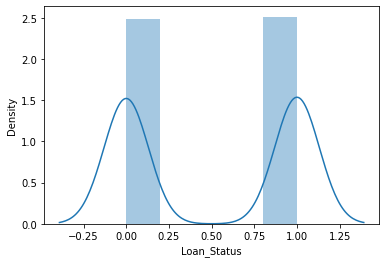

In [205]:
for i in df3.columns:
  print('skewness value of',i,' :',skew(df3[i]))
  print('\n')

  plt.figure()
  sns.distplot(df3[i])
  plt.show()

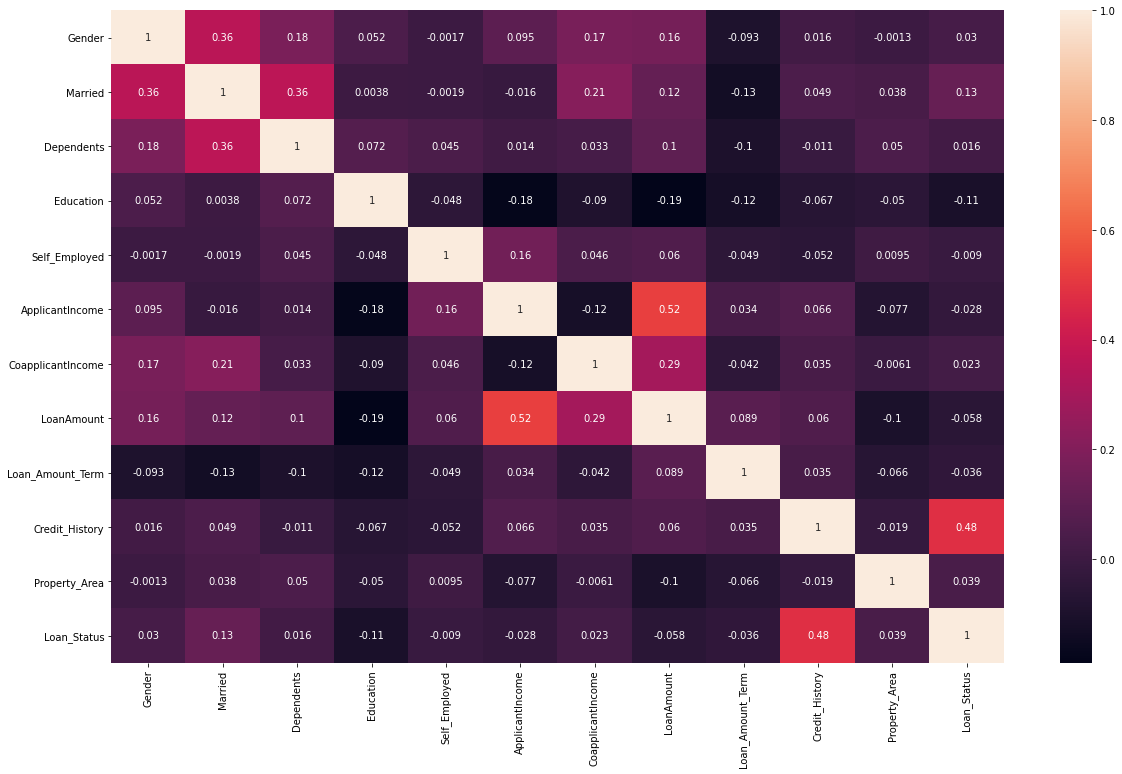

In [206]:
plt.figure(figsize=(20,12))
sns.heatmap(df3.corr(),annot=True)

In [207]:
## target variable is not highly correlated to other features ...so i can apply log or sqrt transformation to remove skewnss`

In [208]:
df3.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [209]:
df3['ApplicantIncome'] = np.log(df3['ApplicantIncome'])
df3['CoapplicantIncome'] = np.sqrt(df3['CoapplicantIncome'])
df3['LoanAmount'] = np.log(df3['LoanAmount'])
df3['Loan_Amount_Term'] = np.log(df3['Loan_Amount_Term'])


In [210]:
df3.skew()

Gender              -1.590297
Married             -0.497459
Dependents           1.092907
Education            1.198230
Self_Employed        2.171467
ApplicantIncome      0.131545
CoapplicantIncome    0.638191
LoanAmount          -0.252001
Loan_Amount_Term    -4.756132
Credit_History      -1.429244
Property_Area       -0.030587
Loan_Status         -0.009656
dtype: float64

In [212]:
df3

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,8.674026,0.000000,4.852030,5.886104,1,2,1
1,1,1,1.0,0,0,8.430109,38.832976,4.852030,5.886104,1,0,0
2,1,1,0.0,0,1,8.006368,0.000000,4.189655,5.886104,1,2,1
3,1,1,0.0,1,0,7.856707,48.559242,4.787492,5.886104,1,2,1
4,1,0,0.0,0,0,8.699515,0.000000,4.948760,5.886104,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,0.0,1,0,8.705000,0.000000,5.075174,5.886104,1,2,0
840,1,0,0.0,1,0,8.900140,0.000000,4.787492,5.886104,1,0,0
841,1,1,2.0,0,0,9.082393,0.000000,5.552960,5.886104,0,2,0
842,1,1,2.0,1,0,8.720134,40.311289,5.231109,6.173786,1,1,0


In [213]:
##scaling the features

In [216]:
from sklearn.preprocessing import MinMaxScaler
mms  = MinMaxScaler()
for i in df3.columns:
  df3[i] = mms.fit_transform(df3[[i]])

In [218]:
df3.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.000000,0.0,0.0,0.658357,0.000000,0.660830,0.922014,1.0,1.0,1.0
1,1.0,1.0,0.322581,0.0,0.0,0.614522,0.274591,0.660830,0.922014,1.0,0.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.538370,0.000000,0.495952,0.922014,1.0,1.0,1.0


In [223]:
## building classification models

In [226]:
x = df3.iloc[:,0:-1]
y = df3.iloc[:,-1]

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def max_accuracy(reg,x,y):
    max_acc_score=0
    for r_state in range(50,100):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        acc_score=accuracy_score(test_y,pred)
        print("The accuracy score achieved at r state", r_state, "is", acc_score)
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print("The maximum accuracy", max_acc_score, "is achieved at random state", final_r_state)
    return max_acc_score

In [234]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
max_accuracy(lg,x,y)

The accuracy score achieved at r state 50 is 0.6987951807228916
The accuracy score achieved at r state 51 is 0.6927710843373494
The accuracy score achieved at r state 52 is 0.6987951807228916
The accuracy score achieved at r state 53 is 0.6385542168674698
The accuracy score achieved at r state 54 is 0.6927710843373494
The accuracy score achieved at r state 55 is 0.7228915662650602
The accuracy score achieved at r state 56 is 0.7710843373493976
The accuracy score achieved at r state 57 is 0.7048192771084337
The accuracy score achieved at r state 58 is 0.6927710843373494
The accuracy score achieved at r state 59 is 0.7108433734939759
The accuracy score achieved at r state 60 is 0.7409638554216867
The accuracy score achieved at r state 61 is 0.6385542168674698
The accuracy score achieved at r state 62 is 0.7228915662650602
The accuracy score achieved at r state 63 is 0.7590361445783133
The accuracy score achieved at r state 64 is 0.6867469879518072
The accuracy score achieved at r state 6

0.8192771084337349

In [235]:
## random state 68 is giving max accuracy of 81%

In [236]:
score=cross_val_score(lg,x,y,cv=5).mean()
print("The cross val score is", round(score,2))

The cross val score is 0.71


In [240]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=68,test_size=0.20) ##final set of train and test data

In [241]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy'), 'splitter':('best','random')}
gddt=GridSearchCV(dt,parameters)
gddt.fit(train_x,train_y)
gddt.best_params_

{'criterion': 'entropy', 'splitter': 'random'}

In [242]:
from sklearn.svm import SVC
sv=SVC()
parameters={'C':(1,10),'kernel':('linear','poly','rbf')}
gdsv=GridSearchCV(sv,parameters)
gdsv.fit(train_x,train_y)
gdsv.best_params_

{'C': 10, 'kernel': 'poly'}

In [243]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':(5,10,15,20),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}
gdkn=GridSearchCV(kn,parameters)
gdkn.fit(train_x,train_y)
gdkn.best_params_

{'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'distance'}

In [244]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
parameters={'penalty':('l1','l2')}
gd=GridSearchCV(lg,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'penalty': 'l2'}

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The accuracy score is  0.8192771084337349

The cross val score is 0.7072289156626506

              precision    recall  f1-score   support

         0.0       0.96      0.61      0.74        71
         1.0       0.77      0.98      0.86        95

    accuracy                           0.82       166
   macro avg       0.86      0.79      0.80       166
weighted avg       0.85      0.82      0.81       166


[[43 28]
 [ 2 93]]

roc_auc_score 0.792290585618977


AxesSubplot(0.125,0.808774;0.62x0.0712264)




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
          

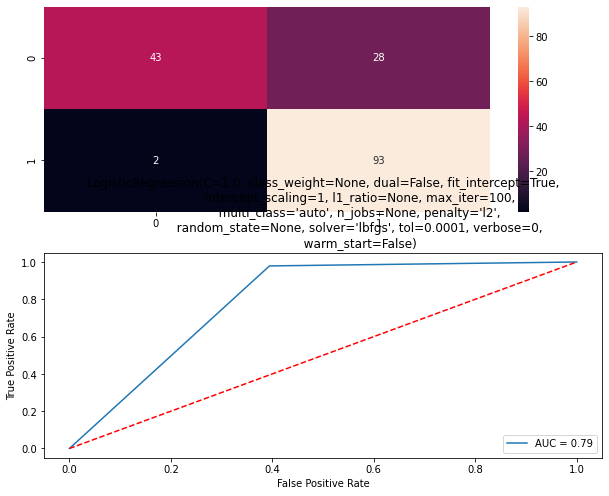

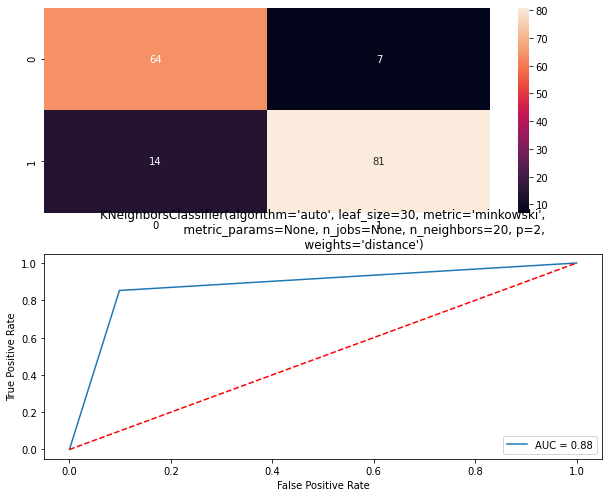

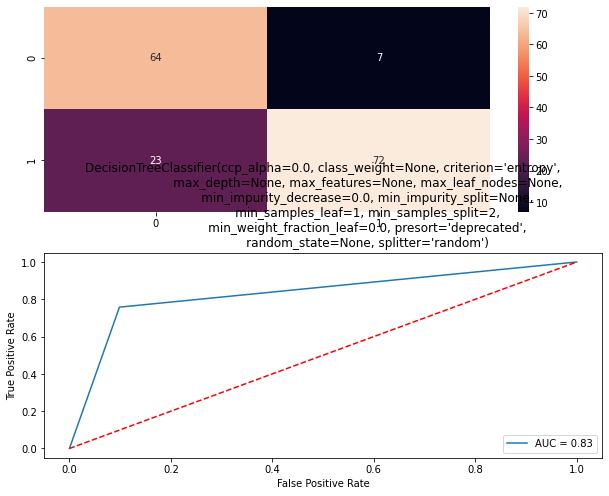

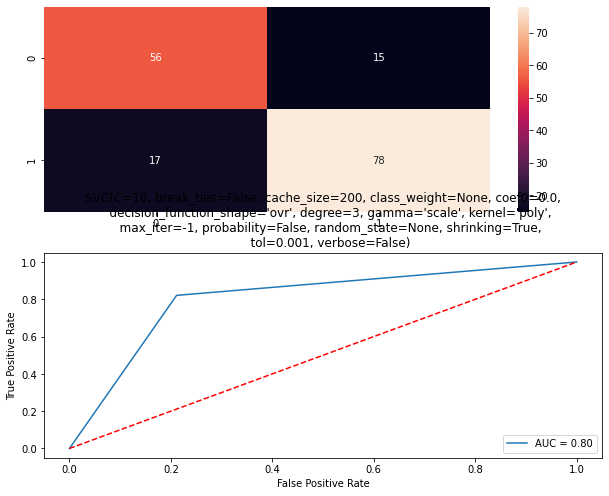

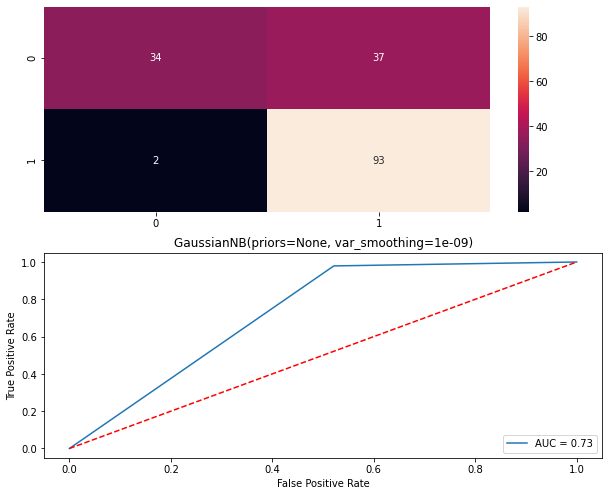

In [251]:
score=[]
cv=[]
rocscore=[]

from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression

algorithms=[LogisticRegression(penalty='l2'),KNeighborsClassifier(algorithm='auto', n_neighbors= 20, weights='distance'), DecisionTreeClassifier(criterion= 'entropy', splitter= 'random'), SVC(C=10, kernel='poly'),GaussianNB()]

for i in algorithms:
    print(i)
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    accscore=accuracy_score(test_y,pred)
    score.append(accscore)
    print("")
    print("The accuracy score is ", accscore)
    print("")
    cvscore=cross_val_score(i,x,y,cv=5,scoring='accuracy').mean()
    cv.append(cvscore)
    print("The cross val score is", cvscore)
    print()
    print(classification_report(test_y,pred))
    print()
    cm=confusion_matrix(test_y,pred)
    print(cm)
    print()
    false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n")
    print("\n")

In [252]:
result=pd.DataFrame({'Model':[LogisticRegression,KNeighborsClassifier, DecisionTreeClassifier, SVC,GaussianNB],'Accuracy_Score':score,'Cross_val_score':cv, 'AUC_ROC':rocscore})
result

,Model,Accuracy_Score,Cross_val_score,AUC_ROC
0,<class 'sklearn.linear_model._logistic.Logisti...,0.819277,0.707229,0.792291
1,<class 'sklearn.neighbors._classification.KNei...,0.873494,0.872289,0.877020
2,<class 'sklearn.tree._classes.DecisionTreeClas...,0.819277,0.842169,0.829652
3,<class 'sklearn.svm._classes.SVC'>,0.807229,0.767470,0.804893
4,<class 'sklearn.naive_bayes.GaussianNB'>,0.765060,0.692771,0.728910


In [253]:
## knn is working best

In [254]:
## trying boosting algos

In [250]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
parameters={'n_estimators':(10,50,100,200,500,600)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(train_x,train_y)
gdrf.best_params_

{'n_estimators': 200}

In [255]:
rf=RandomForestClassifier(n_estimators=200)
max_accuracy(rf,x,y)

The accuracy score achieved at r state 50 is 0.9156626506024096
The accuracy score achieved at r state 51 is 0.8855421686746988
The accuracy score achieved at r state 52 is 0.9036144578313253
The accuracy score achieved at r state 53 is 0.9096385542168675
The accuracy score achieved at r state 54 is 0.8554216867469879
The accuracy score achieved at r state 55 is 0.8674698795180723
The accuracy score achieved at r state 56 is 0.8975903614457831
The accuracy score achieved at r state 57 is 0.9216867469879518
The accuracy score achieved at r state 58 is 0.8795180722891566
The accuracy score achieved at r state 59 is 0.9036144578313253
The accuracy score achieved at r state 60 is 0.8795180722891566
The accuracy score achieved at r state 61 is 0.9337349397590361
The accuracy score achieved at r state 62 is 0.8855421686746988
The accuracy score achieved at r state 63 is 0.8855421686746988
The accuracy score achieved at r state 64 is 0.8855421686746988
The accuracy score achieved at r state 6

0.9578313253012049

In [257]:
cscore=cross_val_score(rf,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score of Random forest classifier is", cscore)

The cross val score of Random forest classifier is 0.9036144578313252


In [258]:
from sklearn.ensemble import GradientBoostingClassifier
gc=GradientBoostingClassifier()
parameters={'learning_rate':(0.001,0.01,0.1,1),'n_estimators':(50,100,200,500),'criterion':('friedman_mse', 'mse', 'mae')}
gbc=GridSearchCV(gc,parameters)
gbc.fit(train_x,train_y)
gbc.best_params_

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'n_estimators': 500}

In [259]:
gc_best=GradientBoostingClassifier(criterion='friedman_mse', learning_rate= 0.1, n_estimators= 500)
max_accuracy(gc,x,y)

The accuracy score achieved at r state 50 is 0.7951807228915663
The accuracy score achieved at r state 51 is 0.8132530120481928
The accuracy score achieved at r state 52 is 0.8132530120481928
The accuracy score achieved at r state 53 is 0.7650602409638554
The accuracy score achieved at r state 54 is 0.7590361445783133
The accuracy score achieved at r state 55 is 0.7831325301204819
The accuracy score achieved at r state 56 is 0.8493975903614458
The accuracy score achieved at r state 57 is 0.8554216867469879
The accuracy score achieved at r state 58 is 0.7771084337349398
The accuracy score achieved at r state 59 is 0.7951807228915663
The accuracy score achieved at r state 60 is 0.8012048192771084
The accuracy score achieved at r state 61 is 0.8072289156626506
The accuracy score achieved at r state 62 is 0.8253012048192772
The accuracy score achieved at r state 63 is 0.8313253012048193
The accuracy score achieved at r state 64 is 0.7590361445783133
The accuracy score achieved at r state 6

0.8674698795180723

In [260]:
cs=cross_val_score(gc_best,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score of GradientBoosting classifier is", cs)

The cross val score of GradientBoosting classifier is 0.8831325301204819


In [261]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
parameters={'learning_rate':(0.001,0.01,0.1,1),'n_estimators':(50,100,200,500),'algorithm':('SAMME', 'SAMME.R')}
gd=GridSearchCV(ad,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 500}

In [263]:
gc=AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 1, n_estimators= 500)
max_accuracy(gc,x,y)

The accuracy score achieved at r state 50 is 0.7831325301204819
The accuracy score achieved at r state 51 is 0.7710843373493976
The accuracy score achieved at r state 52 is 0.7831325301204819
The accuracy score achieved at r state 53 is 0.7771084337349398
The accuracy score achieved at r state 54 is 0.7590361445783133
The accuracy score achieved at r state 55 is 0.7590361445783133
The accuracy score achieved at r state 56 is 0.8132530120481928
The accuracy score achieved at r state 57 is 0.8373493975903614
The accuracy score achieved at r state 58 is 0.7891566265060241
The accuracy score achieved at r state 59 is 0.8012048192771084
The accuracy score achieved at r state 60 is 0.7771084337349398
The accuracy score achieved at r state 61 is 0.8373493975903614
The accuracy score achieved at r state 62 is 0.7590361445783133
The accuracy score achieved at r state 63 is 0.7831325301204819
The accuracy score achieved at r state 64 is 0.8253012048192772
The accuracy score achieved at r state 6

0.8433734939759037

In [264]:
cs=cross_val_score(ad,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score of AdaBoost classifier is", cs)

The cross val score of AdaBoost classifier is 0.755421686746988


In [268]:
result_boosting=pd.DataFrame({'Boosting_Models':[RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier],'Accuracy_Score':[0.95,0.86,0.84],'Cross_val_score':[0.90,0.88,0.75]})
result_boosting

,Boosting_Models,Accuracy_Score,Cross_val_score
0,<class 'sklearn.ensemble._forest.RandomForestC...,0.95,0.90
1,<class 'sklearn.ensemble._gb.GradientBoostingC...,0.86,0.88
2,<class 'sklearn.ensemble._weight_boosting.AdaB...,0.84,0.75


In [269]:
## randomforestclassifier is working best ..
##saving rfc model

In [270]:
import joblib
joblib.dump(rf,'LoanPrediction.pkl')

['LoanPrediction.pkl']